# Ml-flow for sales prediction 

# 1. Import the packages

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import chart_studio.plotly as py
#import plotly.plotly as py
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [84]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from fast_ml.model_development import train_valid_test_split
#import mlflow
#import mlflow.sklearn
import logging
import matplotlib.pyplot as plt


import dvc.api

# 2. Data Preparation

# 2.1. Load Dataset

In [85]:
# Loan Dataset_store 
 
store_data = pd.read_csv(r"C:\Users\Genet Shanko\Pharmaceutical_Sales_Prediction\DVC_Dataset\Store.csv")



In [86]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [87]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [88]:
train_data= pd.read_csv(r"C:\Users\Genet Shanko\Pharmaceutical_Sales_Prediction\DVC_Dataset\train.csv",parse_dates = True,index_col = 'Date')

In [89]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [90]:
# have a glance on the datasets
print("# of observations & # of features", train_data.shape)
train_data.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [91]:
print("# of observations & # of features", store_data.shape)
store_data.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 2.2. Working on Missing Values

In [92]:
print("train:\n\n", train_data.isnull().sum(),  
     "\n\nstore:\n\n", store_data.isnull().sum())

train:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


### 2.3. Remove features with high percentages of missing values

In [33]:
# remove features
store_data_up = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

### 2.4. Replace missing values in features with low percentages of missing values

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

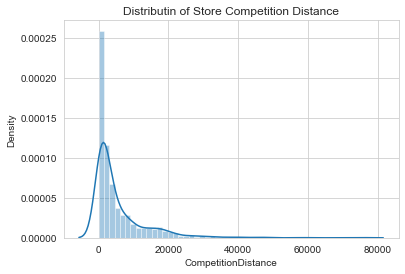

In [34]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_data_up.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

##### The distribution is right skewed, so we'll replace missing values with the median.

In [35]:
# replace missing values in CompetitionDistance with median for the store dataset
store_data_up.CompetitionDistance.fillna(store_data_up.CompetitionDistance.median(), inplace=True)

## 2.4.Date Extraction

In [36]:
# extract year, month, day and week of year from "Date"
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day
train_data['WeekOfYear'] = train_data.index.weekofyear
train_data = train_data.reset_index()

## 2.5.Joining Tables

In [37]:
df = pd.merge(train_data, store_data_up, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [38]:
len(df)

1017209

## 2.6. Drop Subsets Of Data Where Might Cause Bias

In [39]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [40]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [41]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [42]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [43]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

## 2.7. Feature Engineering

In [44]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [45]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [46]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [47]:
# make a copy in case I mess up anything 
df1 = df.copy()

#### 2.7.1 Create new variable "AvgeSales"

##### create a variable that calculates monthly average sales for each store

In [48]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [49]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [50]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

##### 2.7.2. Create new variable "AvgeCustomer"

create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [51]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [52]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [53]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [54]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

##### 2.7.3. Transform Variable "StateHoliday"

In [55]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [56]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

# 3. Exploratory Data Analysis

In [57]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

In [58]:
# set up credential file for plotly
#py.tools.set_credentials_file(username='mei_zmyang', api_key='Z8Jn8zb2xXh4lfckv9xa')

### 3.1. Correlation Heatmap

In [59]:
corr = df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

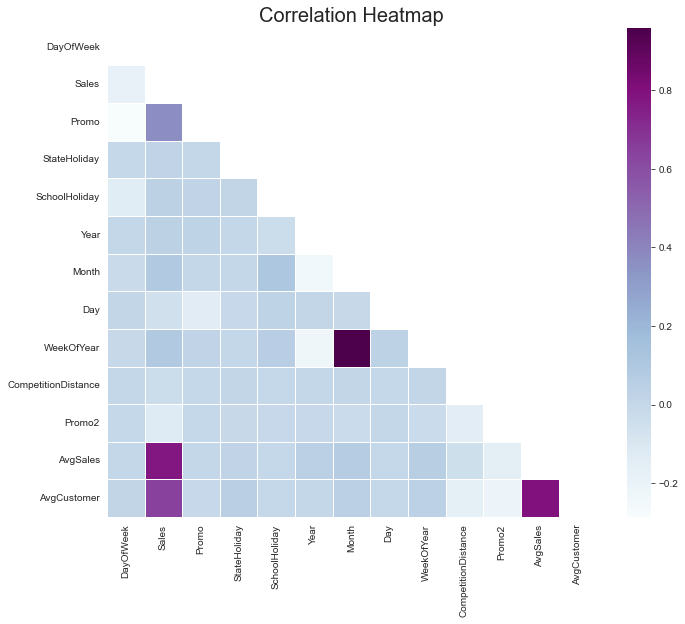

In [60]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

### 3.2.Sales Distribution

In [62]:
sales_dist = [go.Histogram(x=dfv.Sales, marker=dict(color='pink'))]
layout2 = go.Layout(title='Sales Distribution', xaxis=dict(title='daily sales in $'), yaxis=dict(title='number of observations'))
fig2 = go.Figure(data=sales_dist, layout=layout2)
#py.iplot(fig2)

### 3.3.Customer Distribution

In [67]:
cust_dist = [go.Histogram(x=dfv.Customers, marker=dict(color=('blue')))]
layout3 = go.Layout(title='Customer Distribution', 
                   xaxis=dict(title='daily total number of customers'), yaxis=dict(title='number of observations'))
fig3 = go.Figure(data=cust_dist, layout=layout3)
#py.iplot(fig3)

### 3.4. Sales Over Time

In [69]:
store1_2015 = df.query('Store == 1 and Year == 2015')
store1_2013 = df.query('Store == 1 and Year == 2013')
store1_2014 = df.query('Store == 1 and Year == 2014')
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)

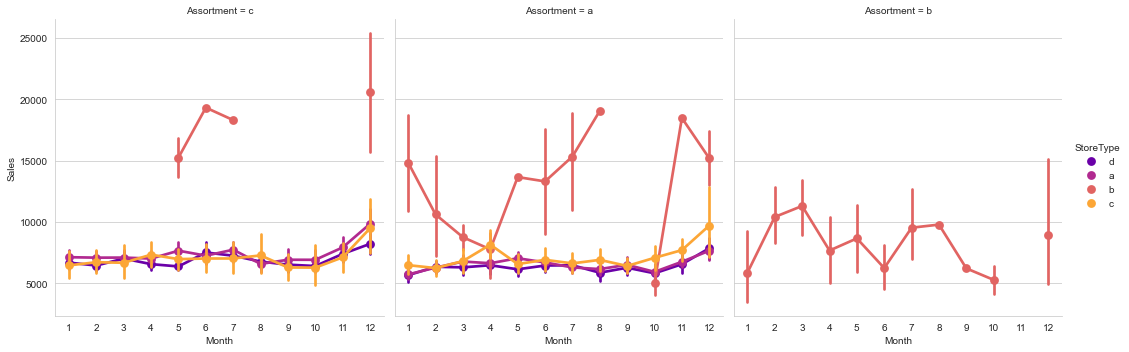

In [70]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

## 3.5. Sales vs. Competition Distance

In [75]:
distance_s = [go.Scatter(x=dfv.CompetitionDistance, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.Customers,
                                 colorbar=dict(title='Number Of Customers'),colorscale='Jet'))]
layout10 = go.Layout(title='Sales vs. Competition Distance', 
                   xaxis=dict(title='Competition Distance'), yaxis=dict(title='Sales'))
fig10 = go.Figure(data=distance_s, layout=layout10)
#py.iplot(fig10)

## 3.6.Sales By Promotion

In [ ]:
s_promo = [go.Box(x=dfv.Promo, y=dfv.Sales,marker=dict(color='purple'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout11 = go.Layout(title='Sales By Promotion', 
                   xaxis=dict(title='Promotion(0-No Promotion; 1-Promotion Period)'), yaxis=dict(title='Total Sales'))
fig11 = go.Figure(data=s_promo, layout=layout11)
py.iplot(fig11)

In [73]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

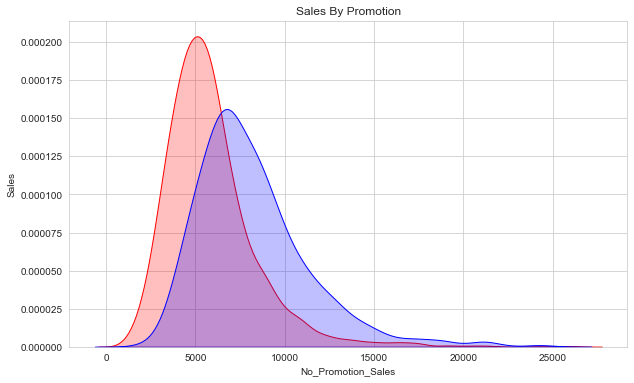

In [74]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

# 4.Store Sales Prediction

In [78]:
dfd = df1.sample(n=50000, random_state=1)

In [79]:
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [80]:
xd = X.copy()
xd = pd.get_dummies(xd)

In [97]:
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [104]:
from packaging.version import parse
import sklearn
if parse(sklearn.__version__) > parse('0.18'):
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split

In [105]:

# split training and test datasets
#from sklearn.cross_validation import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

## 4.1. inear Regression 

In [106]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [107]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534426463092014 , Out of Sample Test Score : 0.7374031695181179
Training RMSE : 1558.666986443433 Testing RMSE : 1569.7998978111068
Training MAPE : 16.994613661280383 Testing MAPE : 17.22398394475225


## 4.2.Bayesian Ridge Regression

In [108]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [109]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534416656134273 , Out of Sample Test Score : 0.7373596254117019
Training RMSE : 1558.6700862832554 Testing RMSE : 1569.930045422206
Training MAPE : 16.99452283743468 Testing MAPE : 17.223700672391924


## 4.3. LARS Lasso Regression

In [110]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [111]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.7534242474036918 , Out of Sample Test Score : 0.7372795308701567
Training RMSE : 1558.7251417391244 Testing RMSE : 1570.1694093096196
Training MAPE : 16.99560177298624 Testing MAPE : 17.22304187417647


## 4.4. Decision Tree Regression

In [112]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [113]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.8547355290084072 , Out of Sample Test Score : 0.7905256000788837
Training RMSE : 1196.3935424504407 Testing RMSE : 1402.0549467036099
Training MAPE : 12.460619402882115 Testing MAPE : 14.720545212650373


## 4.5. Random Forest Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [115]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.9776173327984531 , Out of Sample Test Score : 0.8421803561317978
Training RMSE : 469.62399159340976 Testing RMSE : 1216.9705986687386
Training MAPE : 4.766792929616466 Testing MAPE : 12.58422307022058


## 4.6. K-Nearest Neighbors Regression

In [116]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [117]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.6275829231074073 , Out of Sample Test Score : 0.5761647172167876
Training RMSE : 1915.6190634834409 Testing RMSE : 1994.3349960691344
Training MAPE : 22.92328723312777 Testing MAPE : 23.86808737338713


In [118]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.2560582567580836
Regresion Model Score : 0.8260280353776119 , Out of Sample Test Score : 0.4244378331607054
Regresion Model Score : 0.7624828146157315 , Out of Sample Test Score : 0.48616905577417047
Regresion Model Score : 0.7295772118189889 , Out of Sample Test Score : 0.5119259413797533
Regresion Model Score : 0.7083945329312091 , Out of Sample Test Score : 0.5316113458878855
Regresion Model Score : 0.6920948075644551 , Out of Sample Test Score : 0.5419683336801244
Regresion Model Score : 0.6818876875076971 , Out of Sample Test Score : 0.5474800002284684
Regresion Model Score : 0.673777214265157 , Out of Sample Test Score : 0.5529030760626559
Regresion Model Score : 0.6679792689422281 , Out of Sample Test Score : 0.5579248830238358
Regresion Model Score : 0.6616025760495636 , Out of Sample Test Score : 0.5618704470151104
Regresion Model Score : 0.6561663024850025 , Out of Sample Test Score : 0.5634889369127833
Regresion Mode

## 5. Feature Importance

Text(0.5, 0, 'Relative Importance')

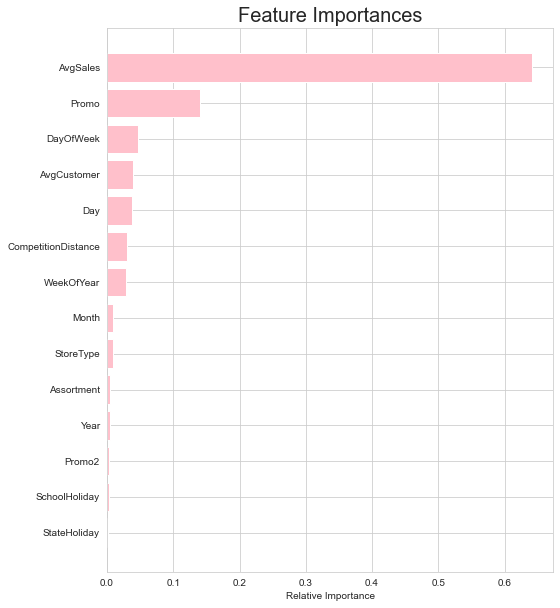

In [119]:
features = xl_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')